In [1]:
import pandas as pd
import time
from naive_bayes import BetaNaiveBayes
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

# Retrieve the data from CSVs

In [2]:
X_train = pd.read_csv('data/X_train.csv')
Y_train = pd.read_csv('data/Y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
Y_test = pd.read_csv('data/Y_test.csv')

X_train_small = pd.read_csv('data/X_train_small.csv')
Y_train_small = pd.read_csv('data/Y_train_small.csv')
X_test_small = pd.read_csv('data/X_test_small.csv')
Y_test_small = pd.read_csv('data/Y_test_small.csv')

# Naive Bayes classifier

In [3]:
parameters = {
    'epsilon': [1e-2, 1e-1, 0.05, 0.09, 0.15, 0.2, 0.3, 0.4, 0.5, 1, 5],
}

naive_bayes = BetaNaiveBayes()
GSCV = GridSearchCV(naive_bayes, parameters, cv=10, n_jobs=-1, verbose=1)
GSCV.fit(X_train_small, Y_train_small.values.ravel())

print ("Best Score: ", GSCV.best_score_)
print ("Best Parameters: ", GSCV.best_params_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
Best Score:  0.8346
Best Parameters:  {'epsilon': 0.1}


In [4]:
best_model = GSCV.best_estimator_
results = GSCV.cv_results_

results_df = pd.DataFrame(results)
results_df = results_df[['param_epsilon', 'mean_test_score', 'rank_test_score']]
results_df = results_df.sort_values(by=['mean_test_score'], ascending=False)
results_df

,param_epsilon,mean_test_score,rank_test_score
1,0.1,0.83460,1
3,0.09,0.83400,2
4,0.15,0.83360,3
5,0.2,0.83355,4
2,0.05,0.83340,5
6,0.3,0.83260,6
7,0.4,0.83160,7
8,0.5,0.82940,8
0,0.01,0.66870,9
9,1,0.11250,10


## Train the best model

In [5]:
time_start = time.time()
best_model.fit(X_train, Y_train.values.ravel())
time_end = time.time()

print("Training time: ", time_end - time_start)

Training time:  0.6930265426635742


## Test the best model 

In [6]:
tiem_start = time.time()
X_pred = best_model.predict(X_test)
time_end = time.time()

print("Testing time: ", time_end - time_start)
print("Test accuracy: ", accuracy_score(Y_test, X_pred))

Testing time:  77.56192398071289
Test accuracy:  0.8433


## Confusion matrix

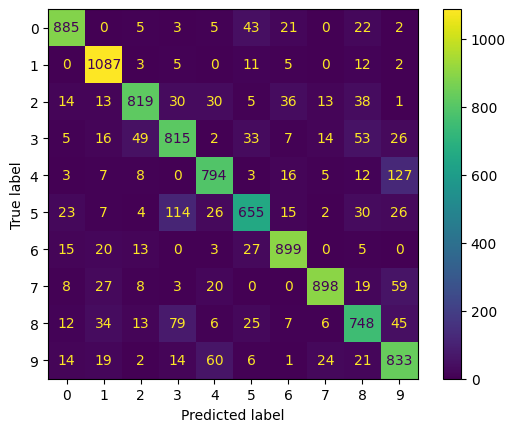

In [7]:
cm = ConfusionMatrixDisplay.from_predictions(Y_test, X_pred)

## Mean images plot
$\frac{\alpha}{\alpha + \beta}$  is the mean of the beta distribution. By computing the mean for each of the 784 models and reshape them into 28x28 images we can have a visual indication of what the model is learning.

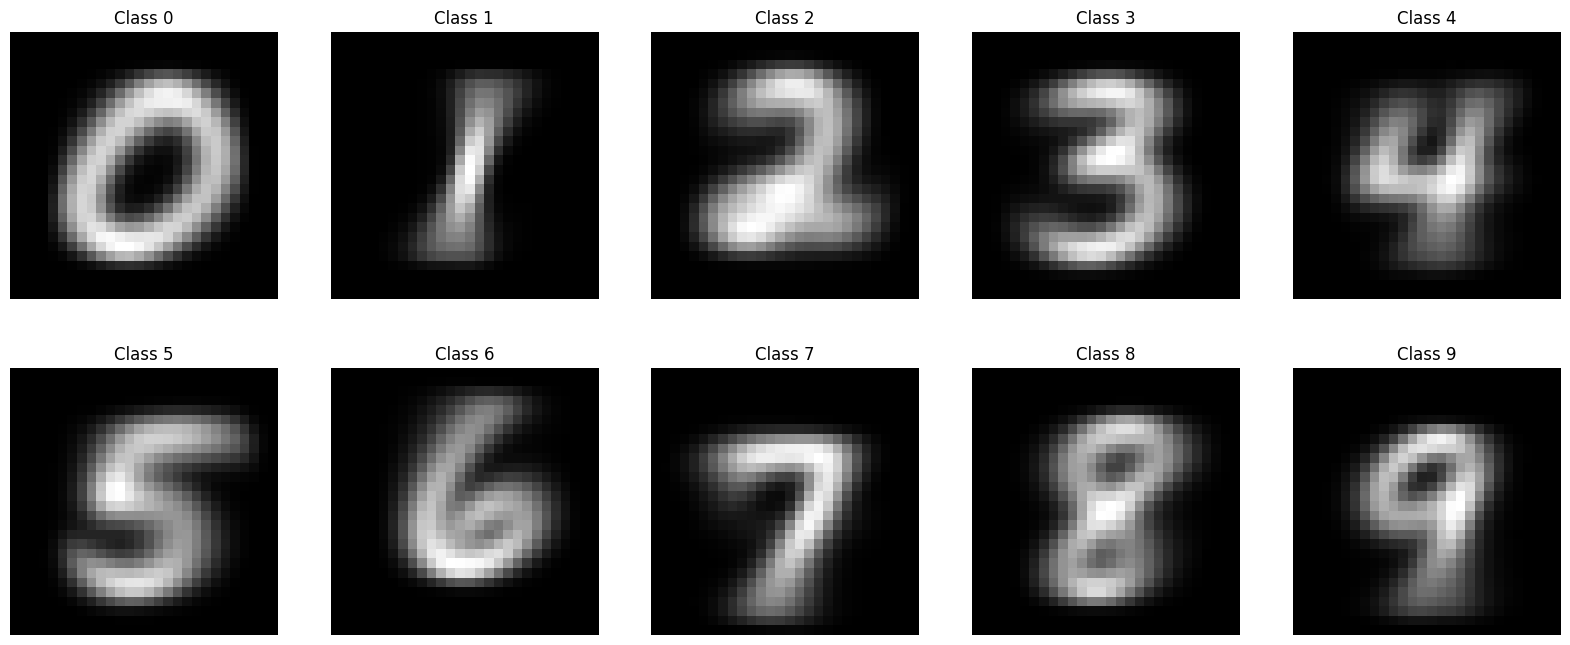

In [8]:
means = best_model.get_mean_images()

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(means[i*5+j], cmap='gray')
        axs[i, j].set_title(f"Class {i*5+j}")
        axs[i, j].axis('off')
        
plt.show()